# Capstone Project 1

## Background

One of the most debatable questions in the field of Finance is whether it is an Art or Science. We have heard of many individuals who become millionaire from the stock market. Some argue that they are “able to tell” which stocks would increase in value (Art) while others insist that the stock market is purely numbers based calculation (Science). 

Since I myself are not one of those people that can predict the movement of the stock prices, I would use Science to predict the movement using different statistical approaches. This project will aim to create an algorithm that will predict the stock price.

There are different ways to predict the stock prices such as:
- Moving Average
- Linear Regression
- Auto ARIMA
- Prophet
- Long Short Term Memory (LSTM)
	
From the statistical method above, I would like to test which one is able to predict the best movement by comparing it day-per-day once the algorithm is done for 3 months while feeding the news to the algorithm as well.

## Data Source

The data source that I will be using is from Alpha Vantage API and for this storytelling project I will focus solely on Disney company. There is a 20-years limitation on the data that is be sourced from Alpha Vantage. Thus, I am planning to start by January 1, 2000 and try to predict the future prices starting January 1, 2020. In the event that they predictions are way off, I will try to use more datapoints.

## Data Cleaning

In [1]:
# Importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import numpy as np
from datetime import date
from alpha_vantage.timeseries import TimeSeries
from dateutil.relativedelta import relativedelta
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

In [42]:
# Declaring the API Key

av_api_key = ''

# I won't be using Twitter for now
#twitter_api_key = 'jzu3E5CJbVcjziMmJhpMfwBjx'

In [3]:
# Use the TimeSeries to declare the API key and output format to pandas

ts = TimeSeries(key=av_api_key,output_format='pandas')

In [4]:
# Pull the Dow Jones Industrial standard to check the data

dji_data, metadata = ts.get_daily(symbol="DJI", outputsize='full')
dji_data.describe()

,1. open,2. high,3. low,4. close,5. volume
count,5022.000000,5022.000000,5022.000000,5022.000000,5.022000e+03
mean,14012.162373,14092.542223,13928.485525,14014.808551,2.190519e+08
std,5165.860782,5175.128154,5155.408258,5166.710904,1.030073e+08
min,6547.009800,6709.609900,6469.950200,6547.049800,8.410000e+06
25%,10414.754875,10479.975325,10356.750025,10414.677700,1.439900e+08
50%,12097.725100,12174.724600,12024.799800,12100.560100,2.148600e+08
75%,16988.632350,17064.167000,16920.724625,16991.605025,2.727575e+08
max,28221.800800,28337.490200,28220.560500,28267.160200,2.190810e+09


In [5]:
# Check the data types

dji_data.dtypes

1. open      float64
2. high      float64
3. low       float64
4. close     float64
5. volume    float64
dtype: object

In [6]:
# Check if any missing values in any of the columns

dji_data.isna().sum()

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

In [7]:
#dji_data.nunique()

In [8]:
# Declare the columns name to be used

columns_name = ['date_info','Open', 'High', 'Low', 'Close', 'Volume']

In [9]:
# Create a function to pull the data

def get_data(company_symbol):
    data, metadata = ts.get_daily(symbol = company_symbol, outputsize='full')
    data.reset_index(level=0, inplace=True)
    data.columns = columns_name
    data['days_since'] = (data['date_info'] - min(data['date_info']) ).astype('timedelta64[D]')
    return data

## Data Storytelling

### Disney

Disney was founded in 1923 and will be celebring its 100th year anniversary in less than 4 years in 2023. It was started by Walt Disney and his brother Roy Disney.

Disney has 2 public offerings during the course of 96 years. The first one is in 1940 and the second one is in 1957.

In [10]:
# Use the function to get the Disney data

dis_data = get_data("DIS")
dis_data.to_csv("Disney " + str(date.today()) + ".csv")
dis_data.head()

,date_info,Open,High,Low,Close,Volume,days_since
0,1999-12-16,28.31,28.31,27.81,28.00,6311300.0,0.0
1,1999-12-17,28.00,28.37,27.75,28.25,11931400.0,1.0
2,1999-12-20,28.19,28.75,27.88,28.14,6948200.0,4.0
3,1999-12-21,28.56,29.19,28.38,28.44,7119600.0,5.0
4,1999-12-22,28.13,29.06,28.13,29.00,5294900.0,6.0


In [11]:
# Find the Pearson correlation on the data

pearsoncorr = dis_data.corr(method='pearson')
pearsoncorr

,Open,High,Low,Close,Volume,days_since
Open,1.000000,0.999901,0.999896,0.999806,-0.127462,0.869851
High,0.999901,1.000000,0.999858,0.999909,-0.124074,0.869412
Low,0.999896,0.999858,1.000000,0.999902,-0.131120,0.870719
Close,0.999806,0.999909,0.999902,1.000000,-0.127270,0.870021
Volume,-0.127462,-0.124074,-0.131120,-0.127270,1.000000,0.029239
days_since,0.869851,0.869412,0.870719,0.870021,0.029239,1.000000


Since the data is mostly prices that is within one day, the Pearson correlation is close to 0

In [12]:
# Find the slope and intercept for the linear regression

slope, intercept = np.polyfit(dis_data['days_since'], dis_data['Close'],1)

In [13]:
# Create the line for the Linear Regression

y = slope * dis_data['days_since'] + intercept

c:\users\vince\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


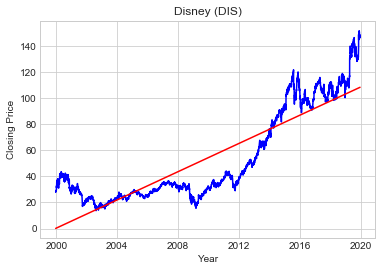

In [14]:
# Plot the 'Close' column to check if there is any irregularities in the data

_ = plt.style.use('seaborn-whitegrid')
_ = plt.plot(dis_data['date_info'], dis_data['Close'], 'b')
_ = plt.plot(dis_data['date_info'], y, 'r')
_ = plt.xlabel("Year")
_ = plt.ylabel("Closing Price")
_ = plt.title("Disney (DIS)")

From the graph above, we can see that if we do linear regression from 2000 to 2020 (red line), it has high Root Mean Square Error (RMSE) meaning that the model does not fit well with the actual data.

In [15]:
# Calculating the RMSE

rmse = sqrt(mean_squared_error(dis_data['Close'], y))
rmse

17.69248587685969

In order to fit and project the future prices, a better model is needed. One approach is to use Machine Learning and this method will be added in the next section.

In [16]:
# Add new column to find the change per day

dis_data['Delta_Open_Close'] = dis_data.apply(lambda row: (row.Close - row.Open) / row.Open, axis=1)
dis_data['Delta_High_Low'] = dis_data.apply(lambda row: row.High - row.Low, axis=1)

In [17]:
# Find the starting date, ending date and number of days of data

min_date = min(dis_data['date_info']).date()
max_date = max(dis_data['date_info']).date()
count_date = len(dis_data.index)
no_years = relativedelta(max_date, min_date).years

In [18]:
# Print the results

print("The earliest date for Disney data is : " + str(min_date.strftime("%b %d %Y")))
print("The latest date for Disney data is : " + str(max_date.strftime("%b %d %Y")))
print("Number of days of transactions : " + str(count_date) + " days in " + str(no_years) + " years")

The earliest date for Disney data is : Dec 16 1999
The latest date for Disney data is : Dec 17 2019
Number of days of transactions : 5033 days in 20 years


In [19]:
# Check the top stats measure

dis_data.describe()

,Open,High,Low,Close,Volume,days_since,Delta_Open_Close,Delta_High_Low
count,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03,5033.000000,5033.000000,5033.000000
mean,54.236299,54.719487,53.727237,54.242694,9.196969e+06,3655.687065,0.000493,0.992250
std,35.912215,36.091899,35.687528,35.889898,5.495803e+06,2108.905156,0.015209,0.728324
min,13.800000,14.100000,13.480000,13.770000,1.487900e+06,0.000000,-0.081545,0.000000
25%,27.050000,27.440000,26.770000,27.050000,6.056682e+06,1831.000000,-0.007038,0.520000
50%,35.020000,35.350000,34.690000,35.050000,7.901886e+06,3654.000000,0.000088,0.790000
75%,91.750000,92.300000,90.950000,91.750000,1.073660e+07,5480.000000,0.007853,1.240000
max,152.940000,153.410000,151.150000,151.640000,1.166250e+08,7306.000000,0.126951,13.080000


In [20]:
# Check for any missing data

dis_data.isna().sum()

date_info           0
Open                0
High                0
Low                 0
Close               0
Volume              0
days_since          0
Delta_Open_Close    0
Delta_High_Low      0
dtype: int64

In [21]:
# Find the high, low

min_close = min(dis_data.Close)
max_close = max(dis_data.Close)
increase = (max_close - min_close) / min_close

In [22]:
# Print the results

print("The lowest closing price for Disney stock is : $" + str(min_close))
print("The highest closing price for Disney stock is : $" + str(max_close))
print("If you invest $100 in Disney stock in " + str(min_date.strftime("%b %d %Y")) + ", it will grow to $" + str(round(100*increase,2)))

The lowest closing price for Disney stock is : $13.77
The highest closing price for Disney stock is : $151.64
If you invest $100 in Disney stock in Dec 16 1999, it will grow to $1001.23


#### Open vs Close

We want to see if there is any big changes within one day of trading by checking the change between stock opening price vs stock closing price.

In [23]:
# Find the min and max of the change between open vs close

print("Biggest Change in One Day for uptick is " + str(max(round(dis_data['Delta_Open_Close']*100, 2))) 
      + "% and for downtick is -" + str(min(round(dis_data['Delta_Open_Close']*199, 2)) * -1) + "%")

Biggest Change in One Day for uptick is 12.7% and for downtick is -16.23%


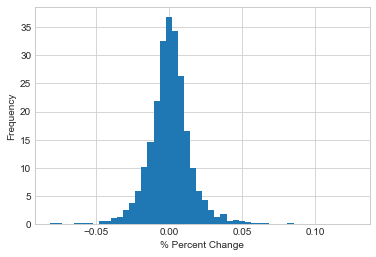

In [24]:
# Plot a histogram of the changes

_ = plt.hist(dis_data['Delta_Open_Close'], bins = 50, density=True)
_ = plt.xlabel("% Percent Change")
_ = plt.ylabel("Frequency")

In [25]:
# Find the mean and standard deviation of the change

mu = np.mean(dis_data['Delta_Open_Close'])
sigma = np.std(dis_data['Delta_Open_Close'])

In [26]:
print("From Opening price, Disney stock has an average to change " + str(round(mu*100,2)) + "% with standard deviation of " 
      + str(round(sigma*100, 2)) + "% to Closing price")

From Opening price, Disney stock has an average to change 0.05% with standard deviation of 1.52% to Closing price


#### Trading Days

For the next analysis, we want to see the change between consecutive trading days.

In [27]:
# Create a function to find the change between 2 trading days

def next_trad_day_delta(data):
    delta_change = []
    for i in range(len(data) - 1):
        change = (data[i+1] - data[i]) / data[i]
        delta_change.append(change)
    
    return delta_change

In [28]:
# Create a list of the changes between the 2 trading days

dis_delta_change = next_trad_day_delta(dis_data.Close)

In [29]:
print("Biggest uptick change in between two trading days is " + str(round(max(dis_delta_change)*100, 2)) 
      + "% and for downtick is -" + str(round(min(dis_delta_change)*100, 2) * -1) + "%")

Biggest uptick change in between two trading days is 15.97% and for downtick is -18.36%


In [30]:
# Find the mean and standard deviation of the change

mu_delta = np.mean(dis_delta_change)
sigma_delta = np.std(dis_delta_change)

In [31]:
print("In average, Disney stock has an average to increase " + str(round(mu_delta*100,2)) + "% with standard deviation of " 
      + str(round(sigma_delta*100, 2)) + "% to the previous day")

In average, Disney stock has an average to increase 0.05% with standard deviation of 1.86% to the previous day


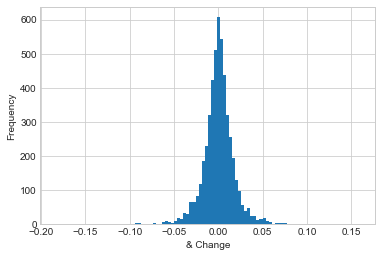

In [32]:
# Plot a histogram of the change

_ = plt.hist(dis_delta_change, bins = 100)
_ = plt.xlabel("& Change")
_ = plt.ylabel("Frequency")

#### By period

In this section, we want to extend the analysis in the section above to a more broader time period of 5, 10, 20 and 253 trading days.

In [33]:
# Create a function to find the change given 2 time ranges (in days)

def find_change(data, delta):
    biggest_change = 0
    smallest_change = max(data) - min(data)
    
    for i in range(len(data) - delta):
        change = data[i+delta] - data[i]
        if change > biggest_change:
            biggest_change = change
        elif change < smallest_change:
            smallest_change = change
        else: next
            
    return np.array([delta, smallest_change, biggest_change])

In [34]:
# Create a DataFrame for the summary of different time delta

def create_summary(data):
    
    summary = pd.DataFrame(columns = ['Days Delta', 'Biggest Drop', 'Biggest Increase'])
    
    for i in [1, 5, 10, 20, 253]:
        array_ = find_change(data, i)
        summary.loc[len(summary)] = array_
        
    return summary

In [35]:
# Apply the function to find the difference for Disney

disney_summary = create_summary(dis_data.Close)
disney_summary

,Days Delta,Biggest Drop,Biggest Increase
0,1.0,-11.16,13.46
1,5.0,-13.69,17.45
2,10.0,-15.64,23.32
3,20.0,-22.89,29.21
4,253.0,-26.53,40.46


In [36]:
# Changing the index to the time delta

disney_summary.set_index('Days Delta')

,Biggest Drop,Biggest Increase
Days Delta,,
1.0,-11.16,13.46
5.0,-13.69,17.45
10.0,-15.64,23.32
20.0,-22.89,29.21
253.0,-26.53,40.46


#### Longest Increase/Drop

The last analysis that we want to see if what is the longest consecutive increase or decrease of the stock price between 2000 to 2020.

In [37]:
dis_data.head()

,date_info,Open,High,Low,Close,Volume,days_since,Delta_Open_Close,Delta_High_Low
0,1999-12-16,28.31,28.31,27.81,28.00,6311300.0,0.0,-0.010950,0.50
1,1999-12-17,28.00,28.37,27.75,28.25,11931400.0,1.0,0.008929,0.62
2,1999-12-20,28.19,28.75,27.88,28.14,6948200.0,4.0,-0.001774,0.87
3,1999-12-21,28.56,29.19,28.38,28.44,7119600.0,5.0,-0.004202,0.81
4,1999-12-22,28.13,29.06,28.13,29.00,5294900.0,6.0,0.030928,0.93


In [38]:
# Create a function to count consecutive days of trend

def continuous_days(data):
    longest_inc = 0
    longest_dec = 0
    counter_pos = 0
    counter_neg = 0
    
    for i in range(len(data) - 1):
        change = data.Close[i+1] - data.Close[i]
        
        if change > 0:
            counter_pos += 1
            counter_neg = 0
        else:
            counter_pos = 0
            counter_neg += 1
            
        if counter_pos > longest_inc:
            longest_inc = counter_pos
            date_end_inc = data.iloc[i, 0]
            date_start_inc = data.iloc[i-longest_inc, 0]
        elif counter_neg > longest_dec:
            longest_dec = counter_neg
            date_end_dec = data.iloc[i, 0]
            date_start_dec = data.iloc[i-longest_inc, 0]
                
    return np.array([longest_inc, date_start_inc.strftime("%b %d %Y"), date_end_inc.strftime("%b %d %Y"), 
                     longest_dec, date_start_dec.strftime("%b %d %Y"), date_end_dec.strftime("%b %d %Y")])

In [39]:
# Find the continuous trend for Disney

cont = continuous_days(dis_data)

In [40]:
print("Longest non-stop increase is " + str(cont[0]) + " trading days between " + str(cont[1]) + " and " + str(cont[2]))

Longest non-stop increase is 12 trading days between Aug 29 2013 and Sep 17 2013


In [41]:
print("Longest non-stop decrease is " + str(cont[3]) + " trading days between " + str(cont[4]) + " and " + str(cont[5]))

Longest non-stop decrease is 10 trading days between Aug 19 2003 and Aug 27 2003
